 <h1 align="center">Faisalabad House Price Prediction Model </h1>

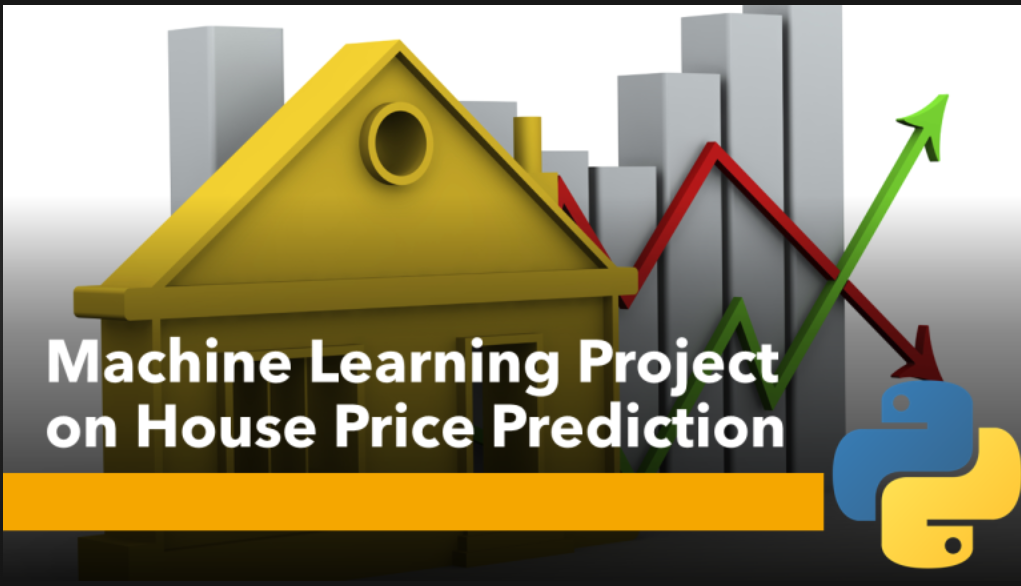

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

<h1 align="center">1-Data Collection</h1>

# Load dataset

In [78]:
data = pd.read_csv('Property_with_Feature_Engineering.csv')
data.head(2)

,property_id,location_id,page_url,property_type,price,price_bin,location,city,province_name,locality,...,area_marla,area_sqft,purpose,bedrooms,date_added,year,month,day,agency,agent
0,347795,8,https://www.zameen.com/Property/lahore_model_t...,House,220000000,Very High,Model Town,Lahore,Punjab,"Model Town, Lahore, Punjab",...,120.0,32670.12,For Sale,0,07-17-2019,2019,7,17,Real Biz International,Usama Khan
1,482892,48,https://www.zameen.com/Property/lahore_multan_...,House,40000000,Very High,Multan Road,Lahore,Punjab,"Multan Road, Lahore, Punjab",...,20.0,5445.02,For Sale,5,10-06-2018,2018,10,6,Khan Estate,mohsinkhan and B


# Dataset of Faisalabad City

In [80]:
data=data[data['city']=='Faisalabad']

In [81]:
data.city.unique()

array(['Faisalabad'], dtype=object)

# Desired  Feature selection 

In [83]:
 columns_to_drop = [
    'property_id', 'location_id', 'page_url', 'price_bin', 'province_name',
    'latitude', 'longitude', 'baths', 'area', 'area_marla', 
    'purpose', 'date_added', 'year', 'month', 'day', 'agency', 'agent'
]

 data = data.drop(columns=columns_to_drop, axis=1)

In [84]:
data.head(3)

,property_type,price,location,city,locality,area_sqft,bedrooms
514,House,8500000,Muslim Town,Faisalabad,"Muslim Town, Faisalabad, Punjab",1361.25,4
515,House,25000000,Millat Town,Faisalabad,"Millat Town, Faisalabad, Punjab",6534.02,5
516,House,6000000,Raza Abad,Faisalabad,"Raza Abad, Faisalabad, Punjab",680.63,4


# Columns name correction

In [86]:
data['type']=data['property_type']
data['area']=data['area_sqft']
data['neighborhood']=data['locality']

In [93]:
data=data.drop(columns=['property_type','area_sqft','city','locality'])

In [95]:
data

,price,location,bedrooms,type,area,neighborhood
514,8500000,Muslim Town,4,House,1361.25,"Muslim Town, Faisalabad, Punjab"
515,25000000,Millat Town,5,House,6534.02,"Millat Town, Faisalabad, Punjab"
516,6000000,Raza Abad,4,House,680.63,"Raza Abad, Faisalabad, Punjab"
517,60000000,Satiana Road,6,House,8712.03,"Satiana Road, Faisalabad, Punjab"
518,8500000,Abdullahpur,4,House,1361.25,"Abdullahpur, Faisalabad, Punjab"
...,...,...,...,...,...,...
189062,30000,Nisar Colony,0,House,680.63,"Nisar Colony, Faisalabad, Punjab"
190301,55000000,Canal Road,0,House,4356.02,"Canal Road, Faisalabad, Punjab"
190302,9500000,Four Season Housing,3,House,1361.25,"Four Season Housing, Faisalabad, Punjab"
190303,6500000,Four Season Housing,0,House,816.75,"Four Season Housing, Faisalabad, Punjab"


# i have dropped city column beacuse dataset is for faisalabad city

In [98]:
data.describe()

,price,bedrooms,area
count,9.080000e+03,9080.000000,9080.000000
mean,8.093145e+06,1.422026,2074.964652
std,1.592102e+07,2.028294,2683.432628
min,3.000000e+03,0.000000,27.230000
25%,3.500000e+04,0.000000,1225.130000
50%,4.500000e+06,0.000000,1361.250000
75%,1.000000e+07,3.000000,2314.130000
max,5.000000e+08,11.000000,138848.010000


<h1 align="center">2-Data Preprocessing</h1>

# handling missing values

In [102]:
print(data.isna().sum())
print("No , any missing value found")

price           0
location        0
bedrooms        0
type            0
area            0
neighborhood    0
dtype: int64
No , any missing value found


In [104]:
len(data)

9080

# Handling outliers

In [107]:
q1=data['price'].quantile(0.25)
q3=data['price'].quantile(0.75)
IQR=q3-q1
IQR

9965000.0

In [109]:
lower=q1-1.5*IQR
upper=q1+1.5*IQR
lower,upper

(-14912500.0, 14982500.0)

# these values are outliers

In [112]:
outliers = data[(data['price'] < lower) | (data['price'] > upper)]


# remove outliers

In [116]:
data = data[(data['price'] > lower) & (data['price'] < upper)]


In [117]:
len(data)

7671

In [118]:
data.sample(5)

,price,location,bedrooms,type,area,neighborhood
101852,50000,Others,0,House,2722.51,"Others, Faisalabad, Punjab"
176035,30000,Four Season Housing,0,House,1905.76,"Four Season Housing, Faisalabad, Punjab"
149059,20000,Rachna Town,0,House,1089.00,"Rachna Town, Faisalabad, Punjab"
8358,8000000,Eden Gardens,4,House,1361.25,"Eden Gardens, Faisalabad, Punjab"
62156,52000,Eden Gardens,4,House,4655.49,"Eden Gardens, Faisalabad, Punjab"


<h1 align="center">3-Normalize features<h1>

In [120]:
label_encoder = LabelEncoder()
data['location'] = label_encoder.fit_transform(data['location'])
data['type'] = label_encoder.fit_transform(data['type'])
data['neighborhood']=label_encoder.fit_transform(data['neighborhood'])


C:\Users\FAST LAPTOP\AppData\Local\Temp\ipykernel_3076\1586510275.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['location'] = label_encoder.fit_transform(data['location'])
C:\Users\FAST LAPTOP\AppData\Local\Temp\ipykernel_3076\1586510275.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['type'] = label_encoder.fit_transform(data['type'])
C:\Users\FAST LAPTOP\AppData\Local\Temp\ipykernel_3076\1586510275.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

<h1 align="center">4-Data Split: Split the dataset into training (80%) and testing (20%)</h1> 


In [127]:
from sklearn.model_selection import train_test_split


In [129]:
X = data[['location', 'bedrooms', 'type', 'area', 'neighborhood']] 
y=data['price']

In [131]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [133]:
len(X_train)

6136

In [135]:
len(X_test)

1535

<h1 align="center">5- Model Fitting </h1>

In [138]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Training LinearRegression...
LinearRegression Performance:
RMSE: 4088963.1041
MAE: 3432910.3131
R²: 0.1593


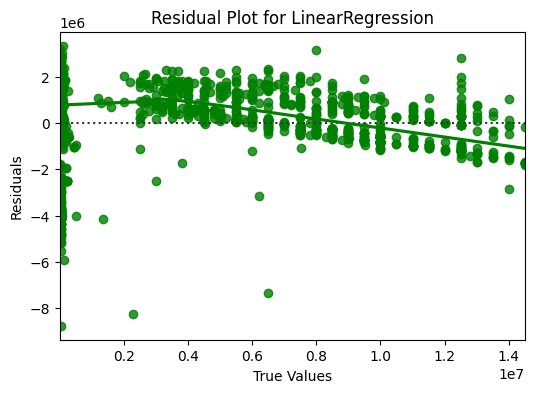


Training DecisionTreeRegressor...
DecisionTreeRegressor Performance:
RMSE: 3329564.1673
MAE: 1909675.1966
R²: 0.4426


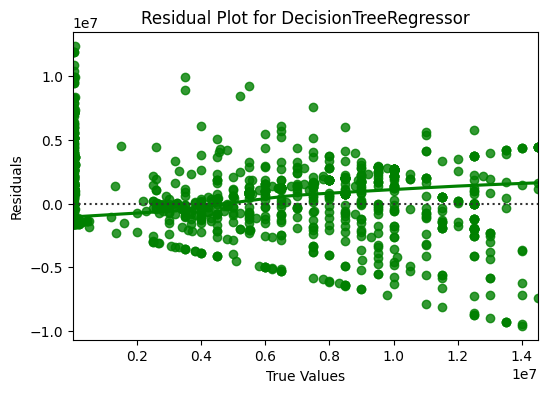


Training RandomForestRegressor...
RandomForestRegressor Performance:
RMSE: 3097328.6353
MAE: 1860166.4671
R²: 0.5176


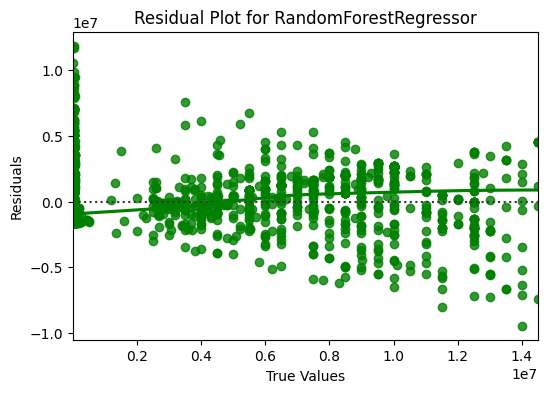


Training GradientBoostingRegressor...
GradientBoostingRegressor Performance:
RMSE: 3364130.7911
MAE: 2528003.0416
R²: 0.4309


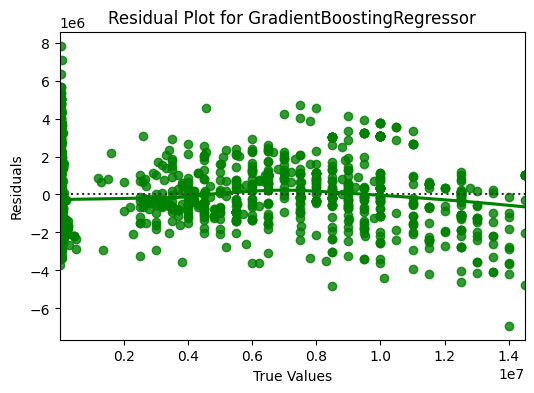


Training AdaBoostRegressor...
AdaBoostRegressor Performance:
RMSE: 3926946.3498
MAE: 3129105.7716
R²: 0.2246


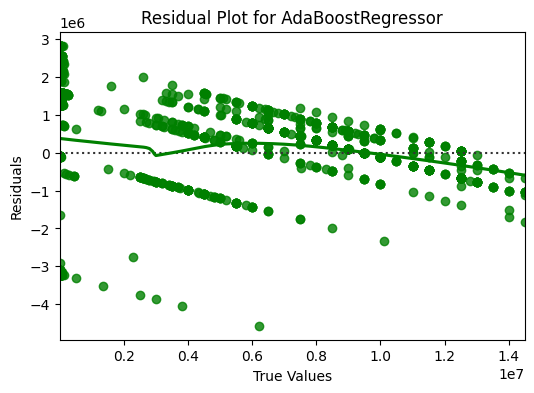


Top 3 Models Based on RMSE:
                       Model          RMSE           MAE        R²
2      RandomForestRegressor  3.097329e+06  1.860166e+06  0.517602
1      DecisionTreeRegressor  3.329564e+06  1.909675e+06  0.442550
3  GradientBoostingRegressor  3.364131e+06  2.528003e+06  0.430915

Evaluation of Top 3 Models:

Score: 0.517601798860324

Model: RandomForestRegressor
RMSE: 3097328.6353
MAE: 1860166.4671
R²: 0.5176

Score: 0.44255004805776466

Model: DecisionTreeRegressor
RMSE: 3329564.1673
MAE: 1909675.1966
R²: 0.4426

Score: 0.43091538033223065

Model: GradientBoostingRegressor
RMSE: 3364130.7911
MAE: 2528003.0416
R²: 0.4309


In [140]:

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor

# Dictionary to store the models
model_dict = {
    'LinearRegression': LinearRegression(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'AdaBoostRegressor': AdaBoostRegressor(),
}

# List to store model results
model_results = []

# Train and evaluate each model
for model_name, model in model_dict.items():
    print(f"\nTraining {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Model evaluation metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    model_results.append({
        'Model': model_name,
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2
    })
    
    print(f"{model_name} Performance:")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R²: {r2:.4f}")
    
    # Plotting residuals for each model
    plt.figure(figsize=(6, 4))
    sns.residplot(x=y_test, y=y_pred, lowess=True, color="g")
    plt.title(f"Residual Plot for {model_name}")
    plt.xlabel("True Values")
    plt.ylabel("Residuals")
    plt.show()

# Convert model results to a DataFrame for easier comparison
results_df = pd.DataFrame(model_results)

# Display the top 3 models based on RMSE
top_3_models = results_df.sort_values(by='RMSE').head(3)
print("\nTop 3 Models Based on RMSE:")
print(top_3_models)

# Summary evaluation of the top 3 models
print("\nEvaluation of Top 3 Models:")
for index, row in top_3_models.iterrows():
    model_name = row['Model']
    model = model_dict[model_name]
    y_pred = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"\nScore: {model.score(X_test,y_test)}")
    print(f"\nModel: {model_name}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R²: {r2:.4f}")


# Model Selection and Evaluation for Property Price Prediction

## Step 1: Identify Top 3 Models Based on Metrics (RMSE and R-Squared)

- Train various models.
- Evaluate their performance on the training set.
- Select the top 3 models based on RMSE and R-Squared metrics.

## Step 2: Train the Top 3 Models Separately

- Fine-tune each of the selected top 3 models using the training data.
- Ensure hyperparameters are optimized for each model.

## Step 3: Evaluate the Top 3 Models on the Testing Set

- Test each of the top 3 models on the testing set.
- Record evaluation metrics (RMSE, MAE, R²) for each model.

## Step 4: Model Comparison

- Compare the performance of all 3 models using RMSE, MAE, and R² on the testing set.
- Analyze and discuss the results to determine the best-performing model.


# Define hyperparameters for each model to fine-tune, including DecisionTreeRegressor


In [ ]:
# Import necessary libraries for fine-tuning
from sklearn.model_selection import GridSearchCV

# Define hyperparameters for each model to fine-tune, including DecisionTreeRegressor
param_grids = {
    'RandomForestRegressor': {
        'n_estimators': [100, 200, 500],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'DecisionTreeRegressor': {
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'GradientBoostingRegressor': {
        'n_estimators': [100, 200, 500],
        'learning_rate': [0.01, 0.1, 0.05],
        'max_depth': [3, 5, 10]
    },
    'AdaBoostRegressor': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1.0]
    }
}

# Fine-tune each of the top 3 models using GridSearchCV
best_models = {}
for model_name in top_3_models['Model']:
    print(f"\nFine-tuning {model_name}...")

    model = model_dict[model_name]
    param_grid = param_grids[model_name]  # Fixed KeyError by adding 'DecisionTreeRegressor'
    
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                               scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    best_models[model_name] = best_model
    
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")

# Evaluate each of the fine-tuned models on the testing set
for model_name, model in best_models.items():
    print(f"\nEvaluating fine-tuned {model_name}...")
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Model evaluation metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Performance of {model_name} after fine-tuning:")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R²: {r2:.4f}")
    
    # Plotting residuals
    plt.figure(figsize=(6, 4))
    sns.residplot(x=y_test, y=y_pred, lowess=True, color="g")
    plt.title(f"Residual Plot for {model_name}")
    plt.xlabel("True Values")
    plt.ylabel("Residuals")
    plt.show()



Fine-tuning RandomForestRegressor...
